# <center>Introduction to Pandas</center>

![](https://pandas.pydata.org/_static/pandas_logo.png)


## Installation

Simply,
```
pip install pandas
```


## Reading data from a CSV file

You can read data from a CSV file using the ``read_csv`` function. By default, it assumes that the fields are comma-separated.

In [128]:
# import pandas
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

>The `imdb.csv` dataset contains Highest Rated IMDb "Top 1000" Titles.

In [129]:
# load imdb dataset as pandas dataframe
df1=pd.read_csv("imdb_1000.csv")

In [130]:
# show first 5 rows of imdb_df
df1.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


>The `bikes.csv` dataset contains information about the number of bicycles that used certain bicycle lanes in Montreal in the year 2012.

In [131]:
# load bikes dataset as pandas dataframe
df2=pd.read_csv("bikes.csv",sep=";",parse_dates=['Date'],dayfirst=True,index_col='Date')

In [132]:
# show first 3 rows of bikes_df
df2[:3]

,Unnamed: 1,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier
Date,,,,,,,,,,
2012-01-01,00:00,16,35,51,38,5.0,26,10,0,27.0
2012-01-02,00:00,43,83,153,68,11.0,53,6,1,21.0
2012-01-03,00:00,58,135,248,104,2.0,89,3,2,15.0


## Selecting columns

When you read a CSV, you get a kind of object called a DataFrame, which is made up of rows and columns. You get columns out of a DataFrame the same way you get elements out of a dictionary.

In [133]:
# list columns of imdb_df
df1.columns


Index(['star_rating', 'title', 'content_rating', 'genre', 'duration',
       'actors_list'],
      dtype='object')

In [134]:
# what are the datatypes of values in columns
df1.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [135]:
# list first 5 movie titles
df1['title'].head()

0    The Shawshank Redemption
1               The Godfather
2      The Godfather: Part II
3             The Dark Knight
4                Pulp Fiction
Name: title, dtype: object

In [136]:
# show only movie title and genre
df1[['title','genre']]

,title,genre
0,The Shawshank Redemption,Crime
1,The Godfather,Crime
2,The Godfather: Part II,Crime
3,The Dark Knight,Action
4,Pulp Fiction,Crime
...,...,...
974,Tootsie,Comedy
975,Back to the Future Part III,Adventure
976,Master and Commander: The Far Side of the World,Action
977,Poltergeist,Horror


## Understanding columns

On the inside, the type of a column is ``pd.Series`` and pandas Series are internally numpy arrays. If you add ``.values`` to the end of any Series, you'll get its internal **numpy array**.

In [137]:
# show the type of duration column
dur=df1['duration']
dur

0      142
1      175
2      200
3      152
4      154
      ... 
974    116
975    118
976    138
977    114
978    126
Name: duration, Length: 979, dtype: int64

In [138]:
# show duration values of movies as numpy arrays
arr=np.array(dur)
arr


array([142, 175, 200, 152, 154,  96, 161, 201, 195, 139, 178, 148, 124,
       142, 179, 169, 133, 207, 146, 121, 136, 130, 130, 106, 127, 116,
       175, 118, 110,  87, 125, 112, 102, 107, 119,  87, 169, 115, 112,
       109, 189, 110, 150, 165, 155, 137, 113, 165,  95, 151, 155, 153,
       125, 130, 116,  89, 137, 117,  88, 165, 170,  89, 146,  99,  98,
       116, 156, 122, 149, 134, 122, 136, 157, 123, 119, 137, 128, 120,
       229, 107, 134, 103, 177, 129, 102, 216, 136,  93,  68, 189,  99,
       108, 113, 181, 103, 138, 110, 129,  88, 160, 126,  91, 116, 125,
       143,  93, 102, 132, 153, 183, 160, 120, 138, 140, 153, 170, 129,
        81, 127, 131, 172, 115, 108, 107, 129, 156,  96,  91,  95, 162,
       130,  86, 186, 151,  96, 170, 118, 161, 131, 126, 131, 129, 224,
       180, 105, 117, 140, 119, 124, 130, 139, 107, 132, 117, 126, 122,
       178, 238, 149, 172,  98, 116, 116, 123, 148, 123, 182,  92,  93,
       100, 135, 105,  94, 140,  83,  95,  98, 143,  99,  98, 12

## Applying functions to columns

Use `.apply` function to apply any function to each element of a column.

In [139]:
# convert all the movie titles to uppercase
df1['title'].str.upper()


0                             THE SHAWSHANK REDEMPTION
1                                        THE GODFATHER
2                               THE GODFATHER: PART II
3                                      THE DARK KNIGHT
4                                         PULP FICTION
                            ...                       
974                                            TOOTSIE
975                        BACK TO THE FUTURE PART III
976    MASTER AND COMMANDER: THE FAR SIDE OF THE WORLD
977                                        POLTERGEIST
978                                        WALL STREET
Name: title, Length: 979, dtype: object

## Plotting a column

Use ``.plot()`` function!

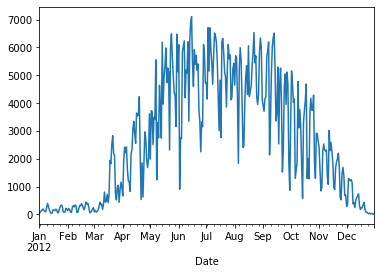

In [140]:
# plot the bikers travelling to Berri1 over the year
df2['Berri1'].plot()

In [141]:
# plot all the columns of bikes_df
df2.columns

Index(['Unnamed: 1', 'Rachel / Papineau', 'Berri1', 'Maisonneuve_2',
       'Maisonneuve_1', 'Brébeuf', 'Parc', 'PierDup',
       'CSC (Côte Sainte-Catherine)', 'Pont_Jacques_Cartier'],
      dtype='object')

## Value counts

Get count of unique values in a particular column/Series.

In [142]:
# what are the unique genre in imdb_df?
df1['genre'].unique()

array(['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
       'History', 'Thriller', 'Family', 'Fantasy'], dtype=object)

In [143]:
# plotting value counts of unique genres as a bar chart
uniq_gen=df1['genre'].value_counts()
uniq_gen

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Thriller       5
Sci-Fi         5
Film-Noir      3
Family         2
Fantasy        1
History        1
Name: genre, dtype: int64

([<matplotlib.patches.Wedge at 0x2140d1fcbc8>,
 [Text(0.690559401763845, 0.856228773538685, 'Crime'),
  Text(-0.7203468250294089, 0.8313245164615624, 'Action'),
  Text(-1.0964621095255178, -0.088152381560861, 'Drama'),
  Text(-0.6711534366177855, -0.871523415931056, 'Western'),
  Text(-0.012354275373648511, -1.0999306213939097, 'Adventure'),
  Text(0.504572064539456, -0.9774492476268991, 'Biography'),
  Text(0.872599162768846, -0.6697542094941316, 'Comedy'),
  Text(1.0284697334606816, -0.3901922697277776, 'Animation'),
  Text(1.0739150063166638, -0.2381313906394535, 'Mystery'),
  Text(1.0895445082523985, -0.15130355097300066, 'Horror'),
  Text(1.0952403048166697, -0.10221875906646853, 'Film-Noir'),
  Text(1.0979560559559636, -0.06702610826853214, 'Sci-Fi'),
  Text(1.0993147704334387, -0.038820555210815164, 'History'),
  Text(1.0997961156637863, -0.0211779123345034, 'Thriller'),
  Text(1.0999490280060602, -0.0105894187056497, 'Family'),
  Text(1.0999943365267277, -0.0035298171516920116,

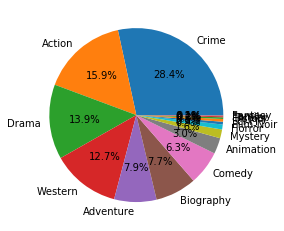

In [144]:
# plotting value counts of unique genres as a pie chart
labels=df1['genre'].unique()
plt.pie(uniq_gen,labels=labels,autopct='%1.1f%%')

## Index

### DATAFRAME = COLUMNS + INDEX + ND DATA

### SERIES = INDEX + 1-D DATA

**Index** or (**row labels**) is one of the fundamental data structure of pandas. It can be thought of as an **immutable array** and an **ordered set**.

> Every row is uniquely identified by its index value.

In [145]:
# show index of bikes_df

In [146]:
# get row for date 2012-01-01

#### To get row by integer index:

Use ``.iloc[]`` for purely integer-location based indexing for selection by position.

In [147]:
# show 11th row of imdb_df using iloc

## Selecting rows where column has a particular value

In [148]:
# select only those movies where genre is adventure

In [149]:
# which genre has highest number of movies with star rating above 8 and duration more than 130 minutes?

## Adding a new column to DataFrame

In [150]:
# add a weekday column to bikes_df

## Deleting an existing column from DataFrame

In [151]:
# remove column 'Unnamed: 1' from bikes_df

## Deleting a row in DataFrame

In [152]:
# remove row no. 1 from bikes_df

## Group By

Any groupby operation involves one of the following operations on the original object. They are −

- Splitting the Object

- Applying a function

- Combining the results

In many situations, we split the data into sets and we apply some functionality on each subset. In the apply functionality, we can perform the following operations −

- **Aggregation** − computing a summary statistic

- **Transformation** − perform some group-specific operation

- **Filtration** − discarding the data with some condition

In [153]:
# group imdb_df by movie genres

In [154]:
# get crime movies group

In [155]:
# get mean of movie durations for each group

In [156]:
# change duration of all movies in a particular genre to mean duration of the group

In [157]:
# drop groups/genres that do not have average movie duration greater than 120.

In [158]:
# group weekday wise bikers count

In [159]:
# get weekday wise biker count

In [160]:
# plot weekday wise biker count for 'Berri1'

![](https://memegenerator.net/img/instances/500x/73988569/pythonpandas-is-easy-import-and-go.jpg)